In [67]:
import pandas as pd
df = pd.read_csv('../data/interim/ton-iot-windows-10.csv')
DF_COL_COUNT = len(df.columns)
df.head()

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [68]:
df.dtypes


ts                                               int64
Processor_DPC_Rate                               int64
Processor_pct_ Idle_Time                        object
Processor_pct_ C3_Time                          object
Processor_pct_ Interrupt_Time                   object
                                                 ...  
LogicalDisk(_Total) Avg  Disk Bytes Transfer    object
LogicalDisk(_Total) pct_ Disk Write Time        object
LogicalDisk(_Total) Avg  Disk sec Transfer      object
label                                            int64
type                                            object
Length: 127, dtype: object

Data cleaning

In [69]:
total_NaN_count = 0
for column in df.iloc[:, : DF_COL_COUNT - 2]:
    df[column] = pd.to_numeric(df[column], errors="coerce")
    total_NaN_count += df[column].isna().sum()

    column_mean = df[column].mean()
    df[column].fillna(value=column_mean, inplace=True)
print("Total cells replaced: {}".format(total_NaN_count))

Total cells replaced: 3360


In [70]:
df.dtypes

ts                                                int64
Processor_DPC_Rate                                int64
Processor_pct_ Idle_Time                        float64
Processor_pct_ C3_Time                          float64
Processor_pct_ Interrupt_Time                   float64
                                                 ...   
LogicalDisk(_Total) Avg  Disk Bytes Transfer    float64
LogicalDisk(_Total) pct_ Disk Write Time        float64
LogicalDisk(_Total) Avg  Disk sec Transfer      float64
label                                             int64
type                                             object
Length: 127, dtype: object

Feature Selection

In [71]:
df['Processor_pct_ Interrupt_Time'][df['Processor_pct_ Idle_Time'].isnull()]

Series([], Name: Processor_pct_ Interrupt_Time, dtype: float64)

In [72]:
df['Processor_pct_ C3_Time'].isnull().sum()

0

In [73]:
df['Processor_pct_ Interrupt_Time'].isnull().sum()

0

In [74]:
print('total data containing null values in %'+str((761/35976)*100))

total data containing null values in %2.115299088281076


In [75]:
df.dropna()

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,1554206319,9,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,1554206329,5,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,1554206339,12,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,1554206349,12,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35970,1556099926,0,65.611199,0.0,0.078247,0.0,29.968737,65.611199,33.176760,226.087362,...,0.000486,0.000486,0.000000,8.872802e+03,1.702918,5210.352941,0.016214,0.000286,0,normal
35971,1556099936,0,96.829418,0.0,0.000000,0.0,0.234245,96.829418,0.367761,284.841927,...,0.000350,0.000431,0.002704,1.284407e+04,1.199334,16170.666670,0.011677,0.000360,0,normal
35972,1556099946,0,95.294715,0.0,0.000000,0.0,2.108141,95.294715,2.088548,263.642684,...,0.000168,0.000168,0.000000,9.824538e+03,0.499702,19660.800000,0.005594,0.000336,0,normal
35973,1556099956,0,94.927619,0.0,0.000000,0.0,0.859393,94.927619,2.810513,342.110790,...,0.000440,0.000440,0.000000,2.129987e+04,1.500047,14199.466670,0.014671,0.000293,0,normal


In [76]:
df.dtypes

ts                                                int64
Processor_DPC_Rate                                int64
Processor_pct_ Idle_Time                        float64
Processor_pct_ C3_Time                          float64
Processor_pct_ Interrupt_Time                   float64
                                                 ...   
LogicalDisk(_Total) Avg  Disk Bytes Transfer    float64
LogicalDisk(_Total) pct_ Disk Write Time        float64
LogicalDisk(_Total) Avg  Disk sec Transfer      float64
label                                             int64
type                                             object
Length: 127, dtype: object

In [77]:
df

,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.908172,0.0,0.078240,0.0,61.027509,29.908172,66.200149,480.094991,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,1554206319,9,31.751682,0.0,0.312521,0.0,59.144594,31.751682,66.247735,427.041284,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,1554206329,5,29.495167,0.0,1.168222,0.0,46.027940,29.495167,66.900381,1159.426821,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,1554206339,12,18.224375,0.0,1.097192,0.0,47.806219,18.224375,79.545208,736.622011,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,1554206349,12,14.861187,0.0,1.562431,0.0,41.873151,14.861187,82.735137,896.108598,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35970,1556099926,0,65.611199,0.0,0.078247,0.0,29.968737,65.611199,33.176760,226.087362,...,0.000486,0.000486,0.000000,8.872802e+03,1.702918,5210.352941,0.016214,0.000286,0,normal
35971,1556099936,0,96.829418,0.0,0.000000,0.0,0.234245,96.829418,0.367761,284.841927,...,0.000350,0.000431,0.002704,1.284407e+04,1.199334,16170.666670,0.011677,0.000360,0,normal
35972,1556099946,0,95.294715,0.0,0.000000,0.0,2.108141,95.294715,2.088548,263.642684,...,0.000168,0.000168,0.000000,9.824538e+03,0.499702,19660.800000,0.005594,0.000336,0,normal
35973,1556099956,0,94.927619,0.0,0.000000,0.0,0.859393,94.927619,2.810513,342.110790,...,0.000440,0.000440,0.000000,2.129987e+04,1.500047,14199.466670,0.014671,0.000293,0,normal


droping ts

In [78]:
df.drop(['ts'],inplace=True,axis=1)

In [79]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

Data visualization

e:\miniproject\IDS-ML-MiniProject\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


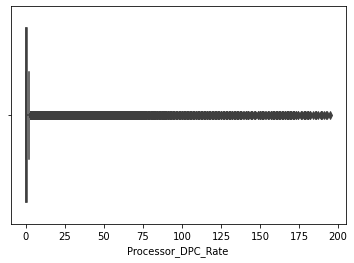

In [81]:
sns.boxplot(df.Processor_DPC_Rate);

e:\miniproject\IDS-ML-MiniProject\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


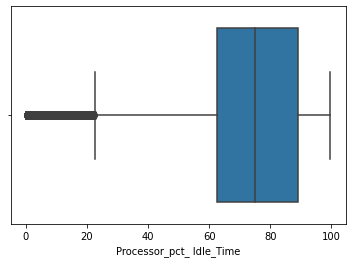

In [82]:
sns.boxplot(df['Processor_pct_ Idle_Time']);

e:\miniproject\IDS-ML-MiniProject\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


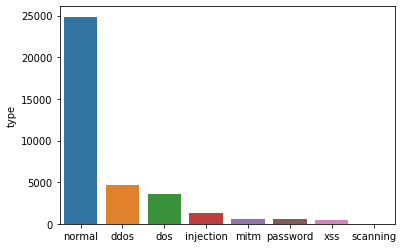

In [83]:
sns.barplot(df.type.unique(),df.type.value_counts());

e:\miniproject\IDS-ML-MiniProject\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


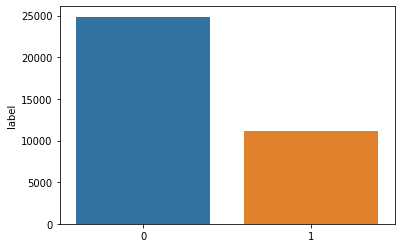

In [84]:
sns.barplot(df.label.unique(),df.label.value_counts());

Convarting categorical values to descrete data

In [85]:
df=pd.concat([pd.get_dummies(df.type),df],axis=1)
df.head()

,ddos,dos,injection,mitm,normal,password,scanning,xss,Processor_DPC_Rate,Processor_pct_ Idle_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,0,0,0,1,0,0,0,4,29.908172,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,0,0,0,0,1,0,0,0,9,31.751682,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,0,0,0,0,1,0,0,0,5,29.495167,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,0,0,0,0,1,0,0,0,12,18.224375,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,0,0,0,0,1,0,0,0,12,14.861187,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal


In [86]:
df.head()

,ddos,dos,injection,mitm,normal,password,scanning,xss,Processor_DPC_Rate,Processor_pct_ Idle_Time,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,0,0,0,0,1,0,0,0,4,29.908172,...,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0,normal
1,0,0,0,0,1,0,0,0,9,31.751682,...,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0,normal
2,0,0,0,0,1,0,0,0,5,29.495167,...,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0,normal
3,0,0,0,0,1,0,0,0,12,18.224375,...,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0,normal
4,0,0,0,0,1,0,0,0,12,14.861187,...,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0,normal


In [87]:
df.drop(['type'],inplace=True,axis=1)

In [88]:
df

,ddos,dos,injection,mitm,normal,password,scanning,xss,Processor_DPC_Rate,Processor_pct_ Idle_Time,...,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label
0,0,0,0,0,1,0,0,0,4,29.908172,...,20546.65089,0.134876,0.163098,2.822198,1.924988e+06,402.582784,9100.481592,13.487612,0.000405,0
1,0,0,0,0,1,0,0,0,9,31.751682,...,25742.31139,0.157564,0.189279,3.171506,1.497233e+06,355.134332,11153.554490,15.756429,0.000533,0
2,0,0,0,0,1,0,0,0,5,29.495167,...,35969.10535,0.401774,0.782472,38.069810,1.854229e+06,760.431768,26994.265950,40.177378,0.001028,0
3,0,0,0,0,1,0,0,0,12,18.224375,...,40019.44778,0.259062,0.768934,50.987167,1.591239e+07,699.499954,53141.663800,25.906233,0.001099,0
4,0,0,0,0,1,0,0,0,12,14.861187,...,32025.59015,0.103836,1.081730,97.789353,2.360930e+07,1184.550425,40988.684440,10.383619,0.000913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35970,0,0,0,0,1,0,0,0,0,65.611199,...,0.00000,0.000486,0.000486,0.000000,8.872802e+03,1.702918,5210.352941,0.016214,0.000286,0
35971,0,0,0,0,1,0,0,0,0,96.829418,...,65536.00000,0.000350,0.000431,0.002704,1.284407e+04,1.199334,16170.666670,0.011677,0.000360,0
35972,0,0,0,0,1,0,0,0,0,95.294715,...,0.00000,0.000168,0.000168,0.000000,9.824538e+03,0.499702,19660.800000,0.005594,0.000336,0
35973,0,0,0,0,1,0,0,0,0,94.927619,...,0.00000,0.000440,0.000440,0.000000,2.129987e+04,1.500047,14199.466670,0.014671,0.000293,0


Train Test Split Data

In [89]:
y=df['label']
x=df.drop(['label'],axis=1)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,train_size=0.7)

PreProcessing Using Minmax Scaller

In [91]:
col=[Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,Processor_pct_ DPC_Time,Processor_C2_ransitions_sec,Processor_pct_ Privileged_Time,Processor_C3_ransitions_sec,Processor_DPCs_Queued_sec,Processor_Interrupts_sec,Process_Pool_Paged Bytes,Process_IO Read_Operations_sec,Process_Working_Set_ Private,Process_Working_Set_Peak,Process_IO_Write Operations_sec,Process_Page_File Bytes,Process_pct_ User_Time,Process_Virtual_Bytes Peak,Process_Page_File Bytes Peak,Process_IO_Other_Bytes_sec,Process_Private_Bytes,Process_IO_Write_Bytes_sec,Process_Elapsed_Time,Process_Virtual_Bytes,Process_pct_ Processor_Time,Process_Creating Process ID,Process_Pool Nonpaged Bytes,Process_Working Set,Process_Page Faults_sec,Process_ID Process,Process_IO Other Operations_sec,Process_IO Data Operations_sec,Process_Thread Count,Process_pct_ Privileged_Time,Process_IO Data Bytes_sec,Process_IO Read Bytes_sec,Process_Priority Base,Process_Handle Count,Network_I(Intel R _82574L_GNC)TCP_APS,Network_I(Intel R _82574L_GNC) Packets Received Unknown,Network_I(Intel R _82574L_GNC) Bytes Received sec,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Network_I(Intel R _82574L_GNC) Packets Outbound Errors,Network_I(Intel R _82574L_GNC) Packets Received Discarded,Network_I(Intel R _82574L_GNC) Bytes Total sec,Network_I(Intel R _82574L_GNC) Packets Outbound Discarded,Network_I(Intel R _82574L_GNC) TCP RSC Exceptions sec,Network_I(Intel R _82574L_GNC) Packets Sent Unicast sec,Network_I(Intel R _82574L_GNC) Output Queue Length,Network_I(Intel R _82574L_GNC) Packets Received sec,Network_I(Intel R _82574L_GNC) Current Bandwidth,Network_I(Intel R _82574L_GNC) Packets sec,Network_I(Intel R _82574L_GNC) TCP Active RSC Connections,Network_I(Intel R _82574L_GNC) Packets Sent sec,Network_I(Intel R _82574L_GNC) Packets Received Unicast sec,Network_I(Intel R _82574L_GNC) Packets Sent Non-Unicast sec,Network_I(Intel R _82574L_GNC) Packets Received Non-Unicast sec,Network_I(Intel R _82574L_GNC) TCP RSC Coalesced Packets sec,Network_I(Intel R _82574L_GNC) Offloaded Connections,Network_I(Intel R _82574L_GNC) Packets Received Errors,Memory Pool Paged Bytes,Memory Free & Zero Page List Bytes,Memory Cache Bytes Peak,Memory System Code Resident Bytes,Memory Available Bytes,Memory Commit Limit,Memory Transition Pages RePurposed sec,Memory Pages Output sec,Memory Page Reads sec,Memory Demand Zero Faults sec,Memory Available KBytes,Memory Pages sec,Memory Cache Bytes,Memory Pool Nonpaged Bytes,Memory Page Faults sec,Memory Transition Faults sec,Memory System Cache Resident Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Standby Cache Reserve Bytes,Memory Page Writes sec,Memory System Code Total Bytes,Memory Standby Cache Core Bytes,Memory System Driver Resident Bytes,Memory Standby Cache Normal Priority Bytes,Memory Pool Paged Allocs,Memory Pool Nonpaged Allocs,Memory pct_ Committed Bytes In Use,Memory Free System Page Table Entries,Memory Available MBytes,Memory Modified Page List Bytes,Memory Cache Faults sec,Memory Committed Bytes,Memory System Driver Total Bytes,Memory Pages Input sec,Memory Pool Paged Resident Bytes,Memory Write Copies sec,LogicalDisk(_Total) Avg  Disk Bytes Write,LogicalDisk(_Total) pct_ Idle Time,LogicalDisk(_Total) Disk Reads sec,LogicalDisk(_Total) pct_ Free Space,LogicalDisk(_Total) Disk Read Bytes sec,LogicalDisk(_Total) Avg  Disk sec Read,LogicalDisk(_Total) Disk Writes sec,LogicalDisk(_Total) Current Disk Queue Length,LogicalDisk(_Total) Split IO Sec,LogicalDisk(_Total) Free Megabytes,LogicalDisk(_Total) Avg  Disk sec Write,LogicalDisk(_Total) Disk Bytes sec,LogicalDisk(_Total) Avg  Disk Read Queue Length,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg  Disk Bytes Read,LogicalDisk(_Total) Avg  Disk Write Queue Length,LogicalDisk(_Total) Avg  Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg  Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg  Disk sec Transfer]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[col]=scaler.fit_transform(x_train)
scaler.fit(x_test)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4238223852.py, line 1)

In [ ]:
x_train.columns.unique

<bound method Index.unique of Index(['ddos', 'dos', 'injection', 'mitm', 'normal', 'password', 'scanning',
       'xss', 'Processor_DPC_Rate', 'Processor_pct_ Idle_Time',
       ...
       'LogicalDisk(_Total) pct_ Disk Time',
       'LogicalDisk(_Total) Avg  Disk Bytes Read',
       'LogicalDisk(_Total) Avg  Disk Write Queue Length',
       'LogicalDisk(_Total) Avg  Disk Queue Length',
       'LogicalDisk(_Total) pct_ Disk Read Time',
       'LogicalDisk(_Total) Disk Write Bytes sec',
       'LogicalDisk(_Total) Disk Transfers sec',
       'LogicalDisk(_Total) Avg  Disk Bytes Transfer',
       'LogicalDisk(_Total) pct_ Disk Write Time',
       'LogicalDisk(_Total) Avg  Disk sec Transfer'],
      dtype='object', length=132)>

Feature selection 
 - using correalaytion remove higly corelated variables 
   df.corr()
 - use https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ feature selection technique 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df.iloc[:, 0:125]
Y = df.iloc[:, -2]

In [ ]:
fit = SelectKBest(score_func=chi2, k=10).fit(X, Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

featureScores = pd.concat([df_columns, df_scores], axis=1)
featureScores.columns = ["Features", "Score"]
featureScores.nlargest(30, "Score")


ValueError: Unknown label type: (array([0.00040512, 0.00053299, 0.00102832, ..., 0.00033582, 0.00029341,
       0.00040704]),)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_xtrain=scaler.fit_transform(x_train)
scale_xtest=scaler.transform(x_test)
#preprocesssing using minmax scaler

In [ ]:
a=pd.DataFrame(scale_xtrain)
a.columns=x_train.columns

In [ ]:
print(a)

       ddos  dos  injection  mitm  normal  password  scanning  xss  \
0       0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
1       0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
2       0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
3       0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
4       0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
...     ...  ...        ...   ...     ...       ...       ...  ...   
25177   0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
25178   0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
25179   0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
25180   0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   
25181   0.0  0.0        0.0   0.0     1.0       0.0       0.0  0.0   

       Processor_DPC_Rate  Processor_pct_ Idle_Time  ...  \
0                0.000000                  0.710412  ...   
1                0.000000              

In [ ]:
b=pd.DataFrame(scale_xtest)
b.columns=x_test.columns
b

,ddos,dos,injection,mitm,normal,password,scanning,xss,Processor_DPC_Rate,Processor_pct_ Idle_Time,...,LogicalDisk(_Total) pct_ Disk Time,LogicalDisk(_Total) Avg Disk Bytes Read,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.384615,0.424205,...,0.072235,0.010611,0.023282,0.160317,0.084328,0.038919,0.401689,0.011056,0.007761,0.005797
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.005128,0.660913,...,0.000321,0.000000,0.001643,0.000712,0.000000,0.002870,0.002341,0.012450,0.000548,0.004424
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.603211,...,0.002343,0.013897,0.000090,0.005199,0.002897,0.000026,0.010665,0.013389,0.000030,0.007088
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.959289,...,0.000020,0.019518,0.000055,0.000045,0.000012,0.000070,0.000078,0.016757,0.000018,0.008376
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.005128,0.759821,...,0.000511,0.036961,0.000286,0.000378,0.000428,0.000230,0.000512,0.029437,0.000286,0.010735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.005128,0.753892,...,0.000044,0.000000,0.000224,0.000097,0.000000,0.000051,0.000093,0.005586,0.000075,0.015138
10789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.885261,...,0.000114,0.042830,0.000472,0.000252,0.000027,0.000186,0.000171,0.029849,0.000157,0.021434
10790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.926729,...,0.000032,0.017349,0.000104,0.000070,0.000014,0.000109,0.000124,0.013092,0.000035,0.008207
10791,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.678055,...,0.000149,0.023216,0.000197,0.000330,0.000137,0.000160,0.000513,0.022200,0.000066,0.009350
